**Assignment on Model Selection** 


Do the following on titanic dataset

Load the dataset into python environment

Do all the necessary pre-processing steps
Create kNN and SVM models

Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models


**Import necessary libraries**

In [ ]:
# linear algebra
import numpy as np 

In [ ]:
# data processing
import pandas as pd 

In [ ]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [ ]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

**Load the data set into python**

In [ ]:
from google.colab import files
files.upload()

In [86]:
test_dataset = pd.read_csv('test_dataset.csv')

In [87]:
from google.colab import files
files.upload()

Saving train_dataset.csv to train_dataset (1).csv


{'train_dataset.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C

In [88]:
train_dataset = pd.read_csv('train_dataset.csv')
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data analysis**

In [89]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
train_dataset.shape

(891, 12)

In [91]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [92]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

data set has 891 examples.Among two of the features are floats, five are integers and five are objects

In [94]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


for creating machine learning algorithm it is necessary to convert a lot of features into numeric

In [95]:
train_dataset.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Also drop the columns which are not useful

In [96]:
cols = ['Name', 'Ticket', 'Cabin']
train_dataset = train_dataset.drop(cols, axis=1)

In [97]:
train_dataset.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**Exploratory Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


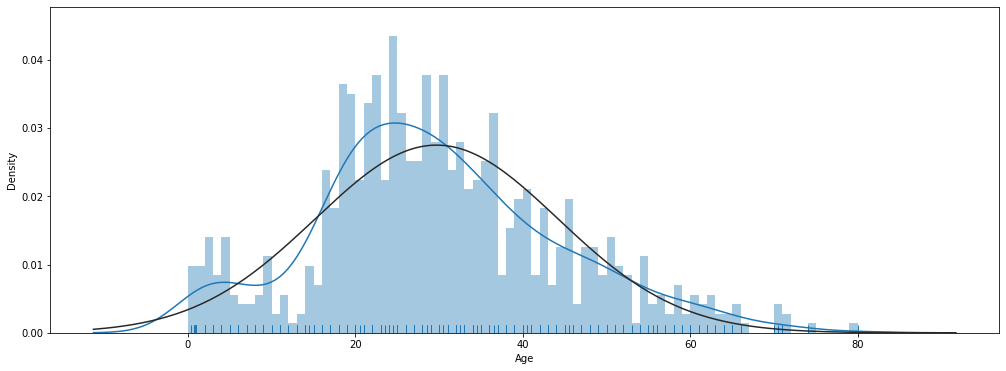

In [98]:
from scipy.stats import norm
plt.figure(figsize = [17,6])
a = sns.distplot(train_dataset['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

most of the passengers are in the range of 10 to 40

Survival rate with respect to age and sex

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


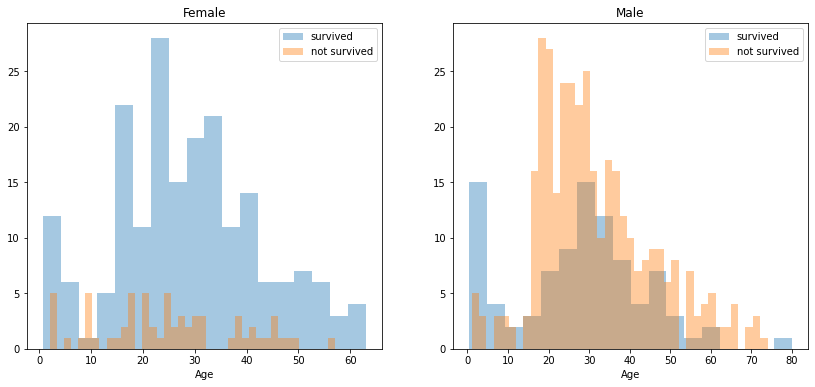

In [99]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
women = train_dataset[train_dataset['Sex']=='female']
men = train_dataset[train_dataset['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

High survival rate for females for the age of 10-30
for men survival rate is low

Pclass

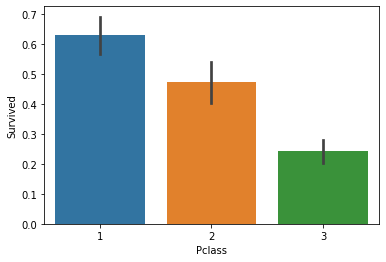

In [100]:
sns.barplot(x='Pclass', y='Survived', data=train_dataset)

Correlation

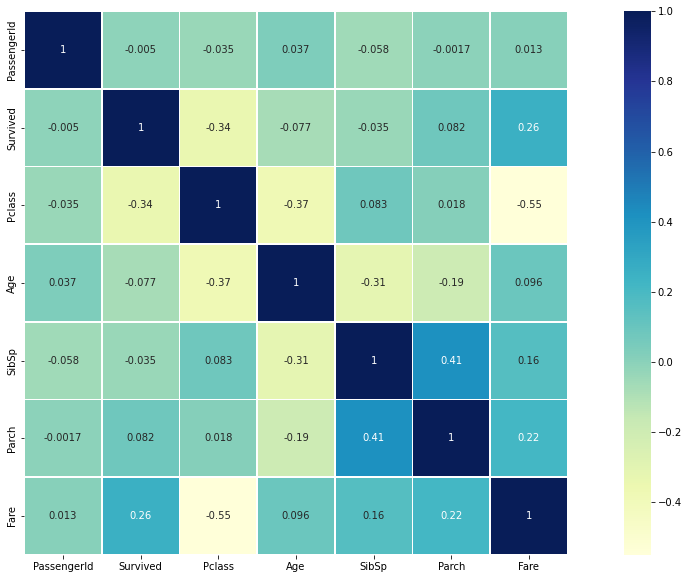

In [101]:
f, ax = plt.subplots(figsize = [20,10])
sns.heatmap(train_dataset.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

**Data Preprocessing**

Missing data

In [102]:
train_dataset['Age'] = train_dataset['Age'].interpolate()

In [103]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

Embarked feature has two missing value fill it with common value.

In [104]:
train_dataset['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [105]:
common_value = 'S'
data = [train_dataset, test_dataset]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [106]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Converting Features

In [107]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Convert ‘Sex’ feature into numeric.

In [170]:
genders = {"male": 0, "female": 1}
data = [train_dataset, test_dataset]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Building Machine Learning Models**

Dividing data set into training set and test set

In [175]:
X_train = train_dataset.drop("Survived", axis=1)
Y_train = train_dataset["Survived"]
X_test  = test_dataset.drop("PassengerId", axis=1).copy()

In [109]:
X = train_dataset.drop(['Survived',
                  'Age'],axis = 1)
y = train_dataset['Survived']
X.shape , y.shape

((891, 7), (891,))

In [110]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 

In [159]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [158]:
clf_svm = SVC()

In [160]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [167]:
mode

['SVM    0.831657']

In [186]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_labels,test_labels=train_test_split(data,label,random_state=7,train_size=0.7)

In [193]:
label=train_dataset.iloc[0:890,1]
data=train_dataset.iloc[0:890,[2,4,5]]
testdat=test_dataset.iloc[0:418,[1,3,4]]
x=[data,testdat]
data=(data.fillna(0)) #filling NA values
testdat=testdat.fillna(0)
print(testdat)

     Survived  Sex   Age
0           0    0  22.0
1           1    1  38.0
2           1    1  26.0
3           1    1  35.0
4           0    0  35.0
..        ...  ...   ...
413         0    0   0.0
414         1    0  44.0
415         0    1   0.0
416         1    1  34.0
417         1    1  18.0

[418 rows x 3 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(data,label)

In [197]:
data = [train_dataset, test_dataset]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(float)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [199]:
label=train_dataset.iloc[0:890,1]
data=train_dataset.iloc[0:890,[2,4,5]]
testdat=test_dataset.iloc[0:418,[1,3,4]]
x=[data,testdat]
data=(data.fillna(0))
testdat=testdat.fillna(0)
print(testdat)

     Survived  Sex  Age
0           0    0  2.0
1           1    1  5.0
2           1    1  3.0
3           1    1  5.0
4           0    0  5.0
..        ...  ...  ...
413         0    0  0.0
414         1    0  6.0
415         0    1  0.0
416         1    1  5.0
417         1    1  1.0

[418 rows x 3 columns]


In [ ]:
predictions=clf.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,predictions))

0.823970037453

In [ ]:
result=clf.predict(testdat)

In [210]:
print(result)

[1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0
 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 1]


In [213]:
print ('SVM =0.831657, kNN = 0.823970037453')

SVM =0.831657, kNN = 0.823970037453


**K-Fold Cross Validation**:

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

**Average accuracy score of the models**

In [215]:
print ('SVM =0.831657, kNN = 0.823970037453')

SVM =0.831657, kNN = 0.823970037453
